**PROBLEM STATEMENT**
1.WHICH GENRE OF MOVIES IS THE MOST PROFITABLE AND HOW WERE THEY RATED BY THE AUDIENCE.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [28]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Group1_Movies_Analysis_Project\merged_movies.csv')
df

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes
0,Avatar,Horror,425000000.0,2.776345e+09,2.351345e+09,760507625.0,2011,18-12-2009,93.0,6.1,43
1,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",410600000.0,1.045664e+09,6.350639e+08,241063875.0,2011,20-05-2011,136.0,6.6,447624
2,Dark Phoenix,"Action,Adventure,Sci-Fi",350000000.0,1.497624e+08,-2.002376e+08,42762350.0,2019,07-06-2019,113.0,6.0,24451
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",330600000.0,1.403014e+09,1.072414e+09,459005868.0,2015,01-05-2015,141.0,7.3,665594
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,678815482.0,2018,27-04-2018,149.0,8.5,670926
...,...,...,...,...,...,...,...,...,...,...,...
2747,Stories of Our Lives,Drama,15000.0,0.000000e+00,-1.500000e+04,0.0,2014,31-12-2014,60.0,7.5,85
2748,Cure,Drama,10000.0,9.459600e+04,8.459600e+04,94596.0,2011,06-07-2001,93.0,4.9,11
2749,Newlyweds,"Comedy,Drama",9000.0,4.584000e+03,-4.416000e+03,4584.0,2011,13-01-2012,95.0,6.4,1436
2750,Red 11,"Horror,Sci-Fi,Thriller",7000.0,0.000000e+00,-7.000000e+03,0.0,2019,31-12-2018,77.0,5.6,43


In [30]:
df.columns

Index(['movie_title', 'genres', 'production_budget', 'worldwide_gross',
       'Revenue', 'domestic_gross', 'start_year', 'release_date',
       'runtime_minutes', 'averagerating', 'numvotes'],
      dtype='object')

In [31]:
#Absolute profit - to identify movies that made most raw money in currency
# > 0 ...Profit
# 0 ....Even
# < 0 ... Loss
df['absolute_profit'] = df['Revenue'] -  df ['production_budget']
df['absolute_profit']

0       1.926345e+09
1       2.244639e+08
2      -5.502376e+08
3       7.418140e+08
4       1.448134e+09
            ...     
2747   -3.000000e+04
2748    7.459600e+04
2749   -1.341600e+04
2750   -1.400000e+04
2751   -2.800000e+03
Name: absolute_profit, Length: 2752, dtype: float64

In [ ]:
# profit_margin = To identify how much relative return was (how much was earned many times the budget)
df['profit_margin'] = (df['Revenue'] - df['production_budget'])/df['production_budget']
df['profit_margin']

0       4.532577
1       0.546673
2      -1.572108
3       2.243841
4       4.827114
          ...   
2747   -2.000000
2748    7.459600
2749   -1.490667
2750   -2.000000
2751   -2.000000
Name: profit_margin, Length: 2752, dtype: float64

In [33]:
print(df[['movie_title','genres','production_budget','absolute_profit','profit_margin']].head())

                                   movie_title                    genres  \
0                                       Avatar                    Horror   
1  Pirates of the Caribbean: On Stranger Tides  Action,Adventure,Fantasy   
2                                 Dark Phoenix   Action,Adventure,Sci-Fi   
3                      Avengers: Age of Ultron   Action,Adventure,Sci-Fi   
4                       Avengers: Infinity War   Action,Adventure,Sci-Fi   

   production_budget  absolute_profit  profit_margin  
0        425000000.0     1.926345e+09       4.532577  
1        410600000.0     2.244639e+08       0.546673  
2        350000000.0    -5.502376e+08      -1.572108  
3        330600000.0     7.418140e+08       2.243841  
4        300000000.0     1.448134e+09       4.827114  


In [ ]:
#Top 10 movies with most money overall
df.sort_values(by = 'absolute_profit', ascending = False).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
0,Avatar,Horror,425000000.0,2.776345e+09,2.351345e+09,760507625.0,2011,18-12-2009,93.0,6.1,43,1.926345e+09,4.532577
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,678815482.0,2018,27-04-2018,149.0,8.5,670926,1.448134e+09,4.827114
25,Jurassic World,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09,652270625.0,2015,12-06-2015,124.0,7.0,539338,1.218855e+09,5.669092
56,Furious 7,"Action,Crime,Thriller",190000000.0,1.518723e+09,1.328723e+09,353007020.0,2015,03-04-2015,137.0,7.2,335074,1.138723e+09,5.993278
19,The Avengers,"Action,Adventure,Sci-Fi",225000000.0,1.517936e+09,1.292936e+09,623279547.0,2012,04-05-2012,143.0,8.1,1183655,1.067936e+09,4.746382
425,Minions,"Adventure,Animation,Comedy",74000000.0,1.160336e+09,1.086336e+09,336045770.0,2015,10-07-2015,91.0,6.4,193917,1.012336e+09,13.680219
137,Frozen,"Adventure,Animation,Comedy",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2013,22-11-2013,102.0,7.5,516998,9.724699e+08,6.483133
136,Frozen,"Fantasy,Romance",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2010,22-11-2013,92.0,5.4,75,9.724699e+08,6.483133
135,Frozen,"Adventure,Drama,Sport",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2010,22-11-2013,93.0,6.2,62311,9.724699e+08,6.483133
97,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",170000000.0,1.305773e+09,1.135773e+09,417719760.0,2018,22-06-2018,128.0,6.2,219125,9.657728e+08,5.681016


In [ ]:
#Top ten movies that earned many times their budget/cost
df.sort_values(by = 'profit_margin', ascending = False).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
2703,The Gallows,"Horror,Mystery,Thriller",100000.0,41656474.0,41556474.0,22764410.0,2015,10-07-2015,81.0,4.2,17763,41456474.0,414.564740
2549,Bambi,"Biography,Documentary",858000.0,268000000.0,267142000.0,102797000.0,2013,13-08-1942,58.0,7.0,101,266284000.0,310.354312
2140,Night of the Living Dead,Horror,114000.0,30087064.0,29973064.0,12087064.0,2014,01-10-1968,79.0,5.3,277,29859064.0,261.921614
2484,Rocky,"Action,Comedy,Drama",1000000.0,225000000.0,224000000.0,117235147.0,2013,21-11-1976,136.0,6.1,46,223000000.0,223.000000
1491,Halloween,"Horror,Thriller",325000.0,70000000.0,69675000.0,47000000.0,2018,17-10-1978,106.0,6.6,88395,69350000.0,213.384615
2485,The Devil Inside,Horror,1000000.0,101759490.0,100759490.0,53262945.0,2012,06-01-2012,83.0,4.2,33522,99759490.0,99.759490
1744,The Birth of a Nation,"Biography,Drama,History",110000.0,11000000.0,10890000.0,10000000.0,2016,08-02-1915,120.0,6.4,18442,10780000.0,98.000000
2649,Graduation Day,Thriller,250000.0,23894000.0,23644000.0,23894000.0,2015,01-05-1981,75.0,5.0,52,23394000.0,93.576000
306,Cinderella,"Drama,Family,Fantasy",2900000.0,263591415.0,260691415.0,85000000.0,2015,15-02-1950,105.0,6.9,142792,257791415.0,88.893591
205,Home,"Drama,Romance,Thriller",500000.0,44793168.0,44293168.0,15433.0,2018,23-04-2009,71.0,8.4,32,43793168.0,87.586336


In [ ]:
# Top 10 movies with their  ratings
df.sort_values(by='averagerating', ascending=False).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
1826,The Runaways,Adventure,9500000.0,5278632.0,-4221368.0,3573673.0,2019,19-03-2010,108.0,9.2,47,-13721368.0,-1.444355
2252,The Wall,Documentary,3000000.0,4495262.0,1495262.0,1803064.0,2010,12-05-2017,78.0,9.2,8,-1504738.0,-0.501579
644,Traffic,Documentary,48000000.0,208300000.0,160300000.0,124107476.0,2014,27-12-2000,110.0,9.2,64,112300000.0,2.339583
676,Frankenstein,Drama,45000000.0,112006296.0,67006296.0,22006296.0,2011,04-11-1994,130.0,9.0,1832,22006296.0,0.489029
1338,Survivor,"Biography,Crime,Documentary",20000000.0,1703281.0,-18296719.0,0.0,2012,29-05-2015,81.0,9.0,45,-38296719.0,-1.914836
528,Dragonfly,"Action,Adventure,Sci-Fi",60000000.0,30063805.0,-29936195.0,30063805.0,2013,22-02-2002,75.0,9.0,5,-89936195.0,-1.498937
1578,Bobby,Drama,14000000.0,20597806.0,6597806.0,11242801.0,2018,17-11-2006,130.0,8.9,23,-7402194.0,-0.528728
1533,Dark Blue,"Crime,Drama",15000000.0,12262065.0,-2737935.0,9237470.0,2011,21-02-2003,85.0,8.9,9,-17737935.0,-1.182529
1856,Skin Trade,Documentary,9000000.0,1242.0,-8998758.0,1242.0,2010,08-05-2015,78.0,8.8,31,-17998758.0,-1.999862
1039,Serendipity,Drama,28000000.0,77477297.0,49477297.0,50255310.0,2018,05-10-2001,107.0,8.8,53,21477297.0,0.767046


In [ ]:
#Top 10 movies with most money overall with their ratings
df.sort_values(by=['absolute_profit', 'averagerating'], ascending=[False, False]).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
0,Avatar,Horror,425000000.0,2.776345e+09,2.351345e+09,760507625.0,2011,18-12-2009,93.0,6.1,43,1.926345e+09,4.532577
4,Avengers: Infinity War,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,678815482.0,2018,27-04-2018,149.0,8.5,670926,1.448134e+09,4.827114
25,Jurassic World,"Action,Adventure,Sci-Fi",215000000.0,1.648855e+09,1.433855e+09,652270625.0,2015,12-06-2015,124.0,7.0,539338,1.218855e+09,5.669092
56,Furious 7,"Action,Crime,Thriller",190000000.0,1.518723e+09,1.328723e+09,353007020.0,2015,03-04-2015,137.0,7.2,335074,1.138723e+09,5.993278
19,The Avengers,"Action,Adventure,Sci-Fi",225000000.0,1.517936e+09,1.292936e+09,623279547.0,2012,04-05-2012,143.0,8.1,1183655,1.067936e+09,4.746382
425,Minions,"Adventure,Animation,Comedy",74000000.0,1.160336e+09,1.086336e+09,336045770.0,2015,10-07-2015,91.0,6.4,193917,1.012336e+09,13.680219
137,Frozen,"Adventure,Animation,Comedy",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2013,22-11-2013,102.0,7.5,516998,9.724699e+08,6.483133
135,Frozen,"Adventure,Drama,Sport",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2010,22-11-2013,93.0,6.2,62311,9.724699e+08,6.483133
136,Frozen,"Fantasy,Romance",150000000.0,1.272470e+09,1.122470e+09,400738009.0,2010,22-11-2013,92.0,5.4,75,9.724699e+08,6.483133
97,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",170000000.0,1.305773e+09,1.135773e+09,417719760.0,2018,22-06-2018,128.0,6.2,219125,9.657728e+08,5.681016


In [44]:
#Top ten movies that earned many times their budget/cost
df.sort_values(by=['profit_margin', 'averagerating'], ascending=[False, False]).head(10)

,movie_title,genres,production_budget,worldwide_gross,Revenue,domestic_gross,start_year,release_date,runtime_minutes,averagerating,numvotes,absolute_profit,profit_margin
2703,The Gallows,"Horror,Mystery,Thriller",100000.0,41656474.0,41556474.0,22764410.0,2015,10-07-2015,81.0,4.2,17763,41456474.0,414.564740
2549,Bambi,"Biography,Documentary",858000.0,268000000.0,267142000.0,102797000.0,2013,13-08-1942,58.0,7.0,101,266284000.0,310.354312
2140,Night of the Living Dead,Horror,114000.0,30087064.0,29973064.0,12087064.0,2014,01-10-1968,79.0,5.3,277,29859064.0,261.921614
2484,Rocky,"Action,Comedy,Drama",1000000.0,225000000.0,224000000.0,117235147.0,2013,21-11-1976,136.0,6.1,46,223000000.0,223.000000
1491,Halloween,"Horror,Thriller",325000.0,70000000.0,69675000.0,47000000.0,2018,17-10-1978,106.0,6.6,88395,69350000.0,213.384615
2485,The Devil Inside,Horror,1000000.0,101759490.0,100759490.0,53262945.0,2012,06-01-2012,83.0,4.2,33522,99759490.0,99.759490
1744,The Birth of a Nation,"Biography,Drama,History",110000.0,11000000.0,10890000.0,10000000.0,2016,08-02-1915,120.0,6.4,18442,10780000.0,98.000000
2649,Graduation Day,Thriller,250000.0,23894000.0,23644000.0,23894000.0,2015,01-05-1981,75.0,5.0,52,23394000.0,93.576000
306,Cinderella,"Drama,Family,Fantasy",2900000.0,263591415.0,260691415.0,85000000.0,2015,15-02-1950,105.0,6.9,142792,257791415.0,88.893591
205,Home,"Drama,Romance,Thriller",500000.0,44793168.0,44293168.0,15433.0,2018,23-04-2009,71.0,8.4,32,43793168.0,87.586336


In [54]:
# Total profit per genre
genre_profit = df.groupby('genres')['absolute_profit'].sum().sort_values(ascending=False).head(10)
genre_profit



genres
Action,Adventure,Sci-Fi       1.611875e+10
Adventure,Animation,Comedy    1.320816e+10
Action,Adventure,Comedy       4.661300e+09
Horror                        3.671708e+09
Action,Adventure,Fantasy      3.521158e+09
Action,Adventure,Animation    3.520879e+09
Horror,Mystery,Thriller       2.591307e+09
Action,Crime,Thriller         1.824456e+09
Adventure,Family,Fantasy      1.722599e+09
Horror,Thriller               1.642614e+09
Name: absolute_profit, dtype: float64

In [53]:
# Average rating per genre
genre_rating = df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10)
genre_rating

genres
Action,Documentary,Drama           8.700
Crime,Documentary                  8.250
Crime,Documentary,History          8.200
Documentary,Drama,History          8.100
Sport                              7.900
Documentary,Sport,Thriller         7.900
Adventure,Drama,Mystery            7.900
Adventure,Biography,Documentary    7.800
Biography,Documentary,Drama        7.725
Documentary,Sport                  7.700
Name: averagerating, dtype: float64

**VISUALIZATION AND INTERPRETATION**


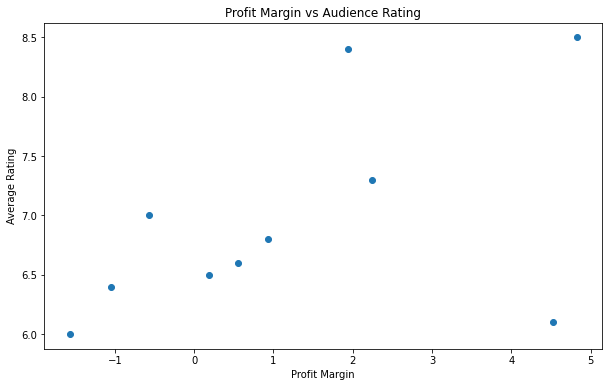

In [64]:
plt.figure(figsize=(10,6))

# Scatter plot: profit margin vs rating
plt.scatter(df['profit_margin'].head(10), df['averagerating'].head(10))

# Labels and title
plt.xlabel('Profit Margin')
plt.ylabel('Average Rating')
plt.title('Profit Margin vs Audience Rating')


plt.show()

PROFIT MARTIN VS AUDIENCE RATING

1. From the table, there are movies that are well received e.g 8.5 ratings that had high profit margin. Although some with low ratings like 6.1 rating get high profit margin despite there weak reception.This shows that finanacial success does not align with what audience love or highly rate.

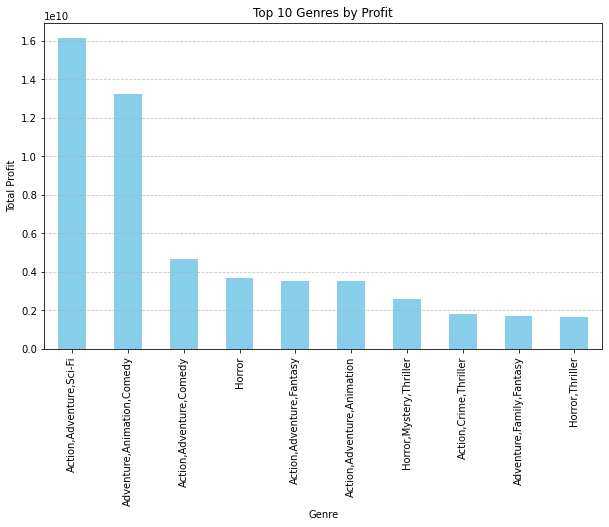

In [66]:


# Group by genre and sum absolute profit
genre_profit = df.groupby('genres')['absolute_profit'].sum().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
genre_profit.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Total Profit')
plt.title('Top 10 Genres by Profit')

# Show grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

GENRE VS MOST PROFITABLE 
1. Genres like (Action, Sci-Fi) and (Adventure,Animation, Comedy) drive the highest profits. Horror stands out as a cost-effective genre,since it has low budget and generates high revenue hence a high Profit margin despite the ratings.

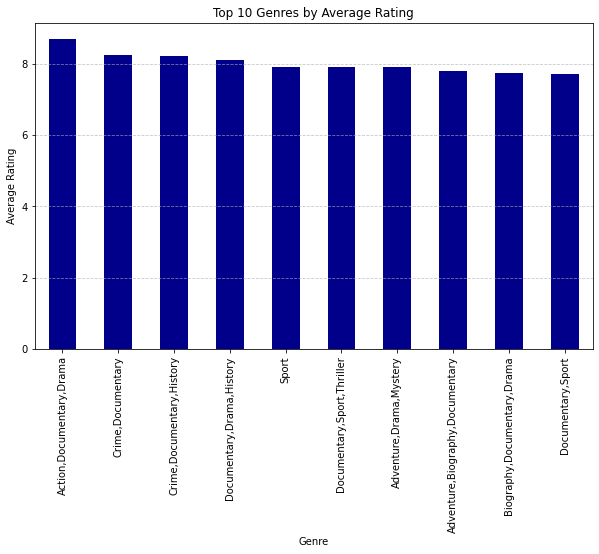

In [67]:


# Average rating per genre
genre_ratings = df.groupby('genres')['averagerating'].mean().sort_values(ascending=False)

# Plot top 5 genres by rating
plt.figure(figsize=(10,6))
genre_ratings.head(10).plot(kind='bar', color='darkblue')

# Labels and title
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres by Average Rating')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

GENRE VS AUDIENCE RATINGS

1. The top-rated genres are Documentary-based especially those with  Drama, Crime, History, and Sport.
2. Action, Documentary, Drama leads with an average rating of 8.7, followed by Crime, Documentary at 8.25.
3. These genres are not the most profitable, but they are deeply appreciated by viewers(High ratings).



RECOMMENDATION

Therefore;
1. The most profitable genres are Action,adventure,Sci-Fi yet the are not rated as the top on the list.

2. Documentary genres receive high ratings suggesting real world content matter to the audience.


- The company will determine whether the primary business objective is for commercial success or audience rating.This decision will guide the choice of genre and where to invest.